Summary Statistics:
                        mean    median           std  skewness  kurtosis
Balance        76485.889288  97198.54  62397.405202 -0.141088 -1.489267
CreditScore      650.528800    652.00     96.653299 -0.071596 -0.426113
NumOfProducts      1.530200      1.00      0.581654  0.745456  0.582089


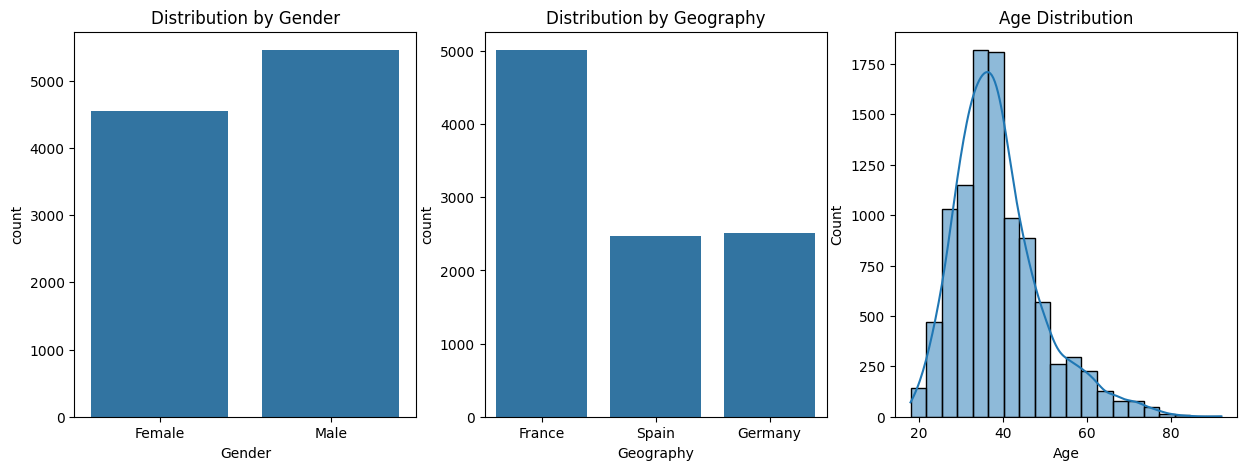

Active vs Inactive No. of Products:
                 min  max      mean
IsActiveMember                    
0                 1    4  1.524438
1                 1    4  1.535624


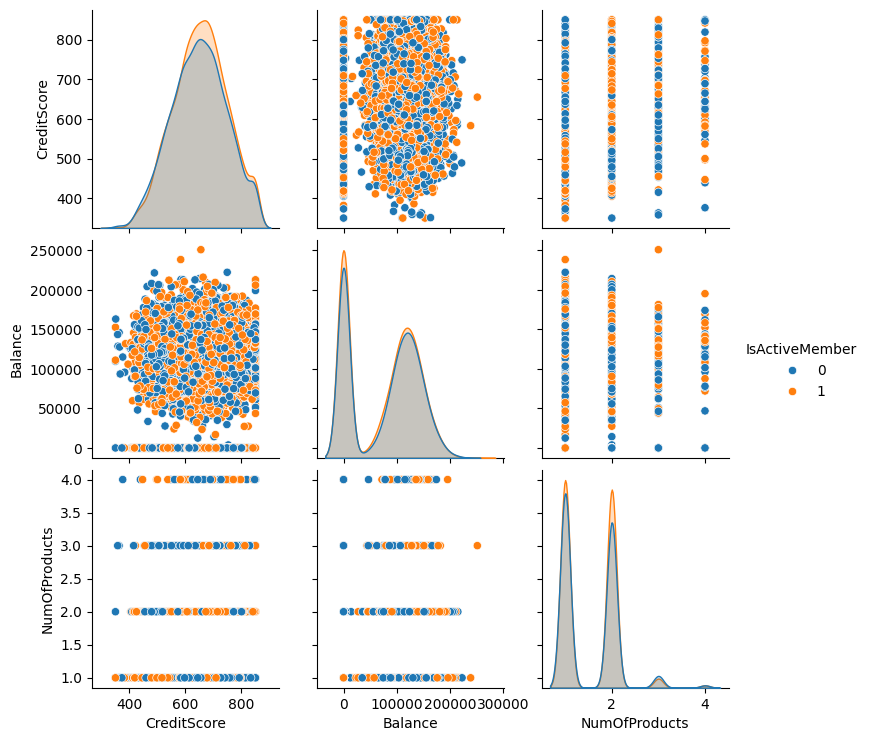

Churn vs. Retained Customers:
              Balance  NumOfProducts
Exited                             
0       72742.750663       1.544210
1       91109.476006       1.475466
Probability of Low Credit Score & High Balance: 0.0638


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

df = pd.read_csv("/content/Bank-Customer-Attrition-Insights-Data.csv")

# Summary statistics for key numerical variables
numerical_cols = [col for col in ['Balance', 'CreditScore', 'NumOfProducts'] if col in df.columns]

if numerical_cols:
    stats_summary = df[numerical_cols].agg(['mean', 'median', 'std']).T
    stats_summary['skewness'] = df[numerical_cols].apply(lambda x: skew(x, nan_policy='omit'))
    stats_summary['kurtosis'] = df[numerical_cols].apply(lambda x: kurtosis(x, nan_policy='omit'))
    print("Summary Statistics:\n", stats_summary)
else:
    print("No numerical columns available for analysis.")

# Distribution of customers by gender, geography, and age
plt.figure(figsize=(15, 5))

if 'Gender' in df.columns:
    plt.subplot(1, 3, 1)
    sns.countplot(x='Gender', data=df)
    plt.title("Distribution by Gender")

if 'Geography' in df.columns:
    plt.subplot(1, 3, 2)
    sns.countplot(x='Geography', data=df)
    plt.title("Distribution by Geography")

if 'Age' in df.columns:
    plt.subplot(1, 3, 3)
    sns.histplot(df['Age'], bins=20, kde=True)
    plt.title("Age Distribution")

plt.show()

# No. of products statistics for active vs. inactive customers
if 'IsActiveMember' in df.columns and 'NumOfProducts' in df.columns:
    active_inactive_stats = df.groupby('IsActiveMember')['NumOfProducts'].agg(['min', 'max', 'mean'])
    print("Active vs Inactive No. of Products:\n", active_inactive_stats)

# Relationship between credit score, balance, and no. of products
sns.pairplot(df, vars=['CreditScore', 'Balance', 'NumOfProducts'], hue='IsActiveMember')
plt.show()

# Differences in balance and no. of products activity between churned and stayed customers
if 'Exited' in df.columns:
    churn_stats = df.groupby('Exited')[['Balance', 'NumOfProducts']].mean()
    print("Churn vs. Retained Customers:\n", churn_stats)

# Probability of a customer having both a low credit score and a high balance
if 'CreditScore' in df.columns and 'Balance' in df.columns:
    low_credit_threshold = df['CreditScore'].quantile(0.25)  # Lower quartile
    high_balance_threshold = df['Balance'].quantile(0.75)  # Upper quartile

    low_credit_high_balance = df[(df['CreditScore'] <= low_credit_threshold) & (df['Balance'] >= high_balance_threshold)]
    probability = len(low_credit_high_balance) / len(df)
    print(f"Probability of Low Credit Score & High Balance: {probability:.4f}")